In [1]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/marve/OneDrive/Desktop/GUVI/Projects/Project_3_crop_Prediction/FAOSTAT_data.xlsx"
df = pd.read_excel(file_path)

# Display basic information
print(df.info())

# Display first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224647 entries, 0 to 224646
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       224647 non-null  object 
 1   Domain            224647 non-null  object 
 2   Area Code (M49)   224647 non-null  int64  
 3   Area              224647 non-null  object 
 4   Element Code      224647 non-null  int64  
 5   Element           224647 non-null  object 
 6   Item Code (CPC)   224642 non-null  object 
 7   Item              224647 non-null  object 
 8   Year Code         224647 non-null  int64  
 9   Year              224647 non-null  int64  
 10  Unit              224645 non-null  object 
 11  Value             218130 non-null  float64
 12  Flag              224643 non-null  object 
 13  Flag Description  224634 non-null  object 
 14  Note              5098 non-null    object 
dtypes: float64(1), int64(4), object(10)
memory usage: 25.7+ MB
None


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2019,2019,ha,29203.0,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2019,2019,kg/ha,1308.3,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2019,2019,t,38205.0,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2020,2020,ha,22134.0,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2020,2020,kg/ha,1775.9,A,Official figure,NaN


In [2]:
# Check unique values in 'Element' column
print("Unique values in 'Element' column:", df["Element"].unique())

# Ensure 'Value' is numeric
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")  # Convert errors to NaN

# Filter only relevant elements
df_filtered = df[df["Element"].isin(["Area harvested", "Production", "Yield"])]

# Pivoting the data: Convert 'Element' values into separate columns
df_pivot = df_filtered.pivot_table(index=["Area", "Item", "Year"], 
                                   columns="Element", 
                                   values="Value").reset_index()

# Rename columns for clarity
df_pivot.columns = ["Area", "Item", "Year", "Area_Harvested", "Production", "Yield"]

# Handle missing values
df_pivot["Area_Harvested"].fillna(df_pivot["Area_Harvested"].median(), inplace=True)
df_pivot["Production"].fillna(df_pivot["Production"].median(), inplace=True)
df_pivot["Yield"].fillna(df_pivot["Yield"].median(), inplace=True)

# Display the transformed dataset
print(df_pivot.head())



Unique values in 'Element' column: ['Area harvested' 'Yield' 'Production' 'Stocks'
 'Producing Animals/Slaughtered' 'Laying' 'Yield/Carcass Weight'
 'Milk Animals']
          Area               Item  Year  Area_Harvested  Production   Yield
0  Afghanistan  Almonds, in shell  2019         29203.0     38205.0  1308.3
1  Afghanistan  Almonds, in shell  2020         22134.0     39307.0  1775.9
2  Afghanistan  Almonds, in shell  2021         36862.0     64256.0  1743.2
3  Afghanistan  Almonds, in shell  2022         36462.0     63515.0  1742.0
4  Afghanistan  Almonds, in shell  2023         37000.0     67000.0  1810.8


C:\Users\marve\AppData\Local\Temp\ipykernel_33676\718223417.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pivot["Area_Harvested"].fillna(df_pivot["Area_Harvested"].median(), inplace=True)
C:\Users\marve\AppData\Local\Temp\ipykernel_33676\718223417.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [3]:
# Save as CSV
df_pivot.to_csv("cleaned_crop_data.csv", index=False)

In [4]:
print(df_pivot.head())

          Area               Item  Year  Area_Harvested  Production   Yield
0  Afghanistan  Almonds, in shell  2019         29203.0     38205.0  1308.3
1  Afghanistan  Almonds, in shell  2020         22134.0     39307.0  1775.9
2  Afghanistan  Almonds, in shell  2021         36862.0     64256.0  1743.2
3  Afghanistan  Almonds, in shell  2022         36462.0     63515.0  1742.0
4  Afghanistan  Almonds, in shell  2023         37000.0     67000.0  1810.8


In [5]:
print(df_pivot.isnull().sum())

Area              0
Item              0
Year              0
Area_Harvested    0
Production        0
Yield             0
dtype: int64


In [6]:
# Checking for missing values
print(df_pivot.isnull().sum())

# Convert Year to integer if not already
df_pivot["Year"] = df_pivot["Year"].astype(int)

# Verify changes
df_pivot.info()

Area              0
Item              0
Year              0
Area_Harvested    0
Production        0
Yield             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82126 entries, 0 to 82125
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            82126 non-null  object 
 1   Item            82126 non-null  object 
 2   Year            82126 non-null  int32  
 3   Area_Harvested  82126 non-null  float64
 4   Production      82126 non-null  float64
 5   Yield           82126 non-null  float64
dtypes: float64(3), int32(1), object(2)
memory usage: 3.4+ MB


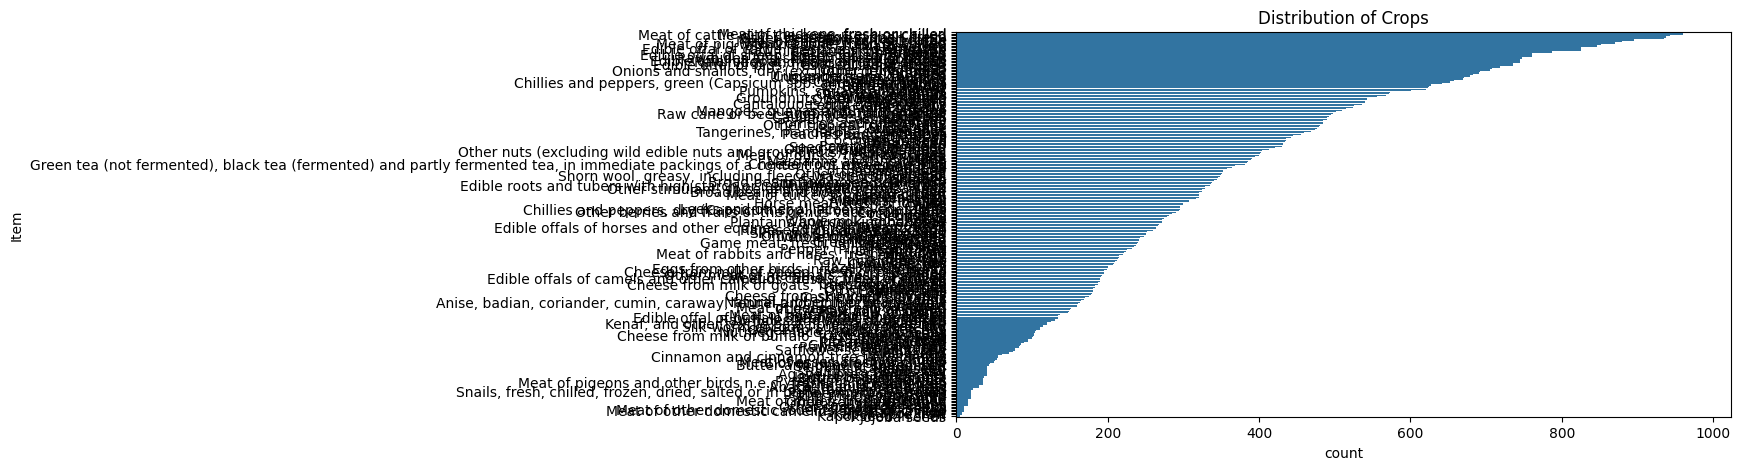

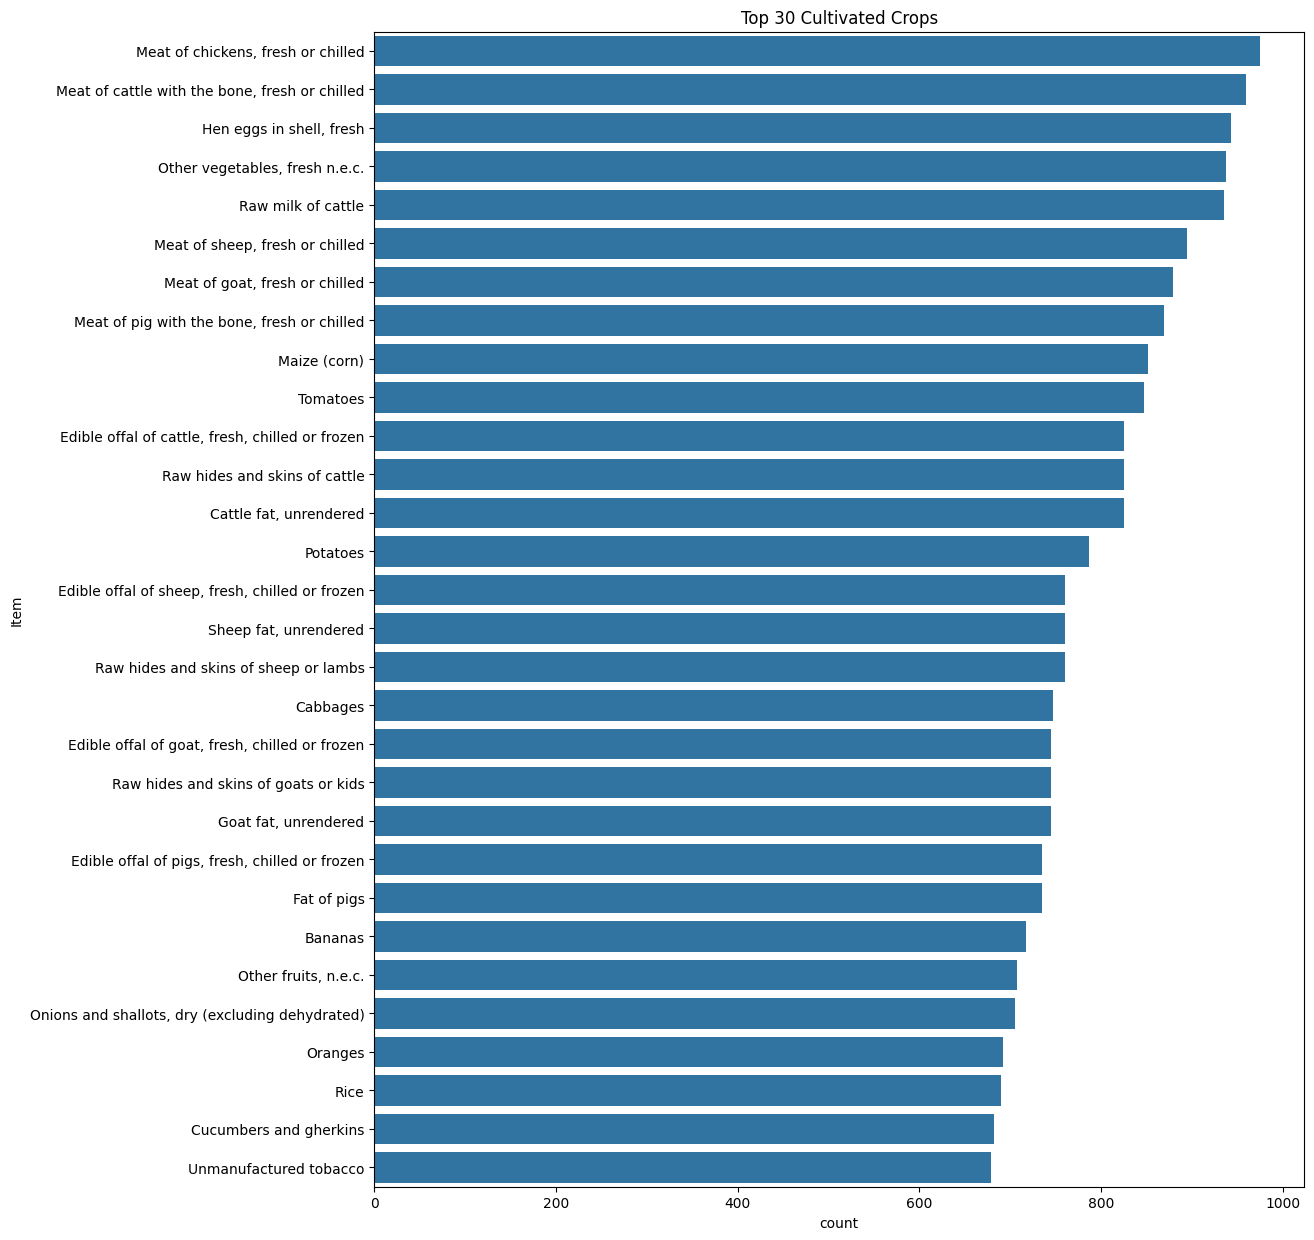

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crop Distribution Analysis
plt.figure(figsize=(10, 5))
sns.countplot(y='Item', data=df_pivot, order=df_pivot['Item'].value_counts().index)
plt.title("Distribution of Crops")
plt.show()

plt.figure(figsize=(12, 15))
sns.countplot(y='Item', data=df_pivot, order=df_pivot['Item'].value_counts().index[:30])
plt.title("Top 30 Cultivated Crops")
plt.show()


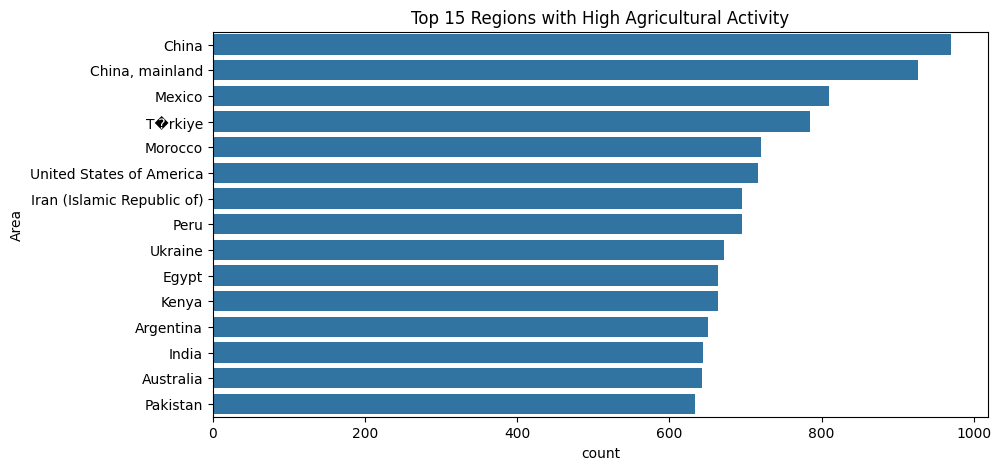

In [8]:
# 2. Geographical Distribution
plt.figure(figsize=(10, 5))
sns.countplot(y='Area', data=df_pivot, order=df_pivot['Area'].value_counts().index[:15])
plt.title("Top 15 Regions with High Agricultural Activity")
plt.show()

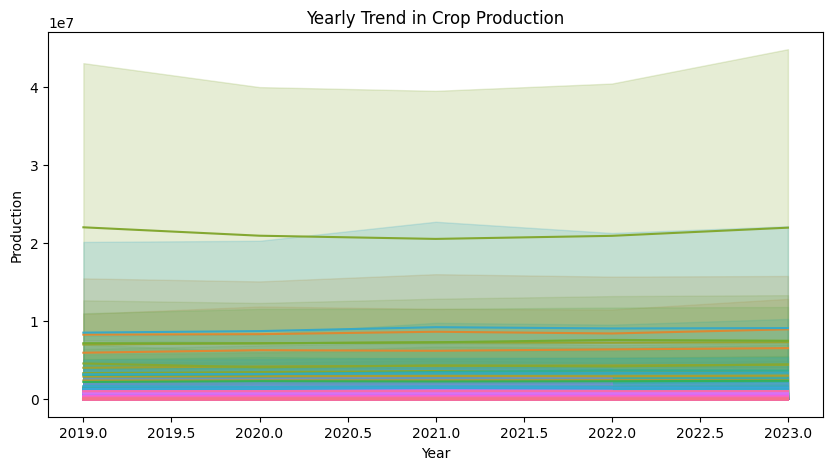

In [9]:
# 3. Temporal Analysis
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Production', data=df_pivot, hue='Item', legend=False)
plt.title("Yearly Trend in Crop Production")
plt.show()

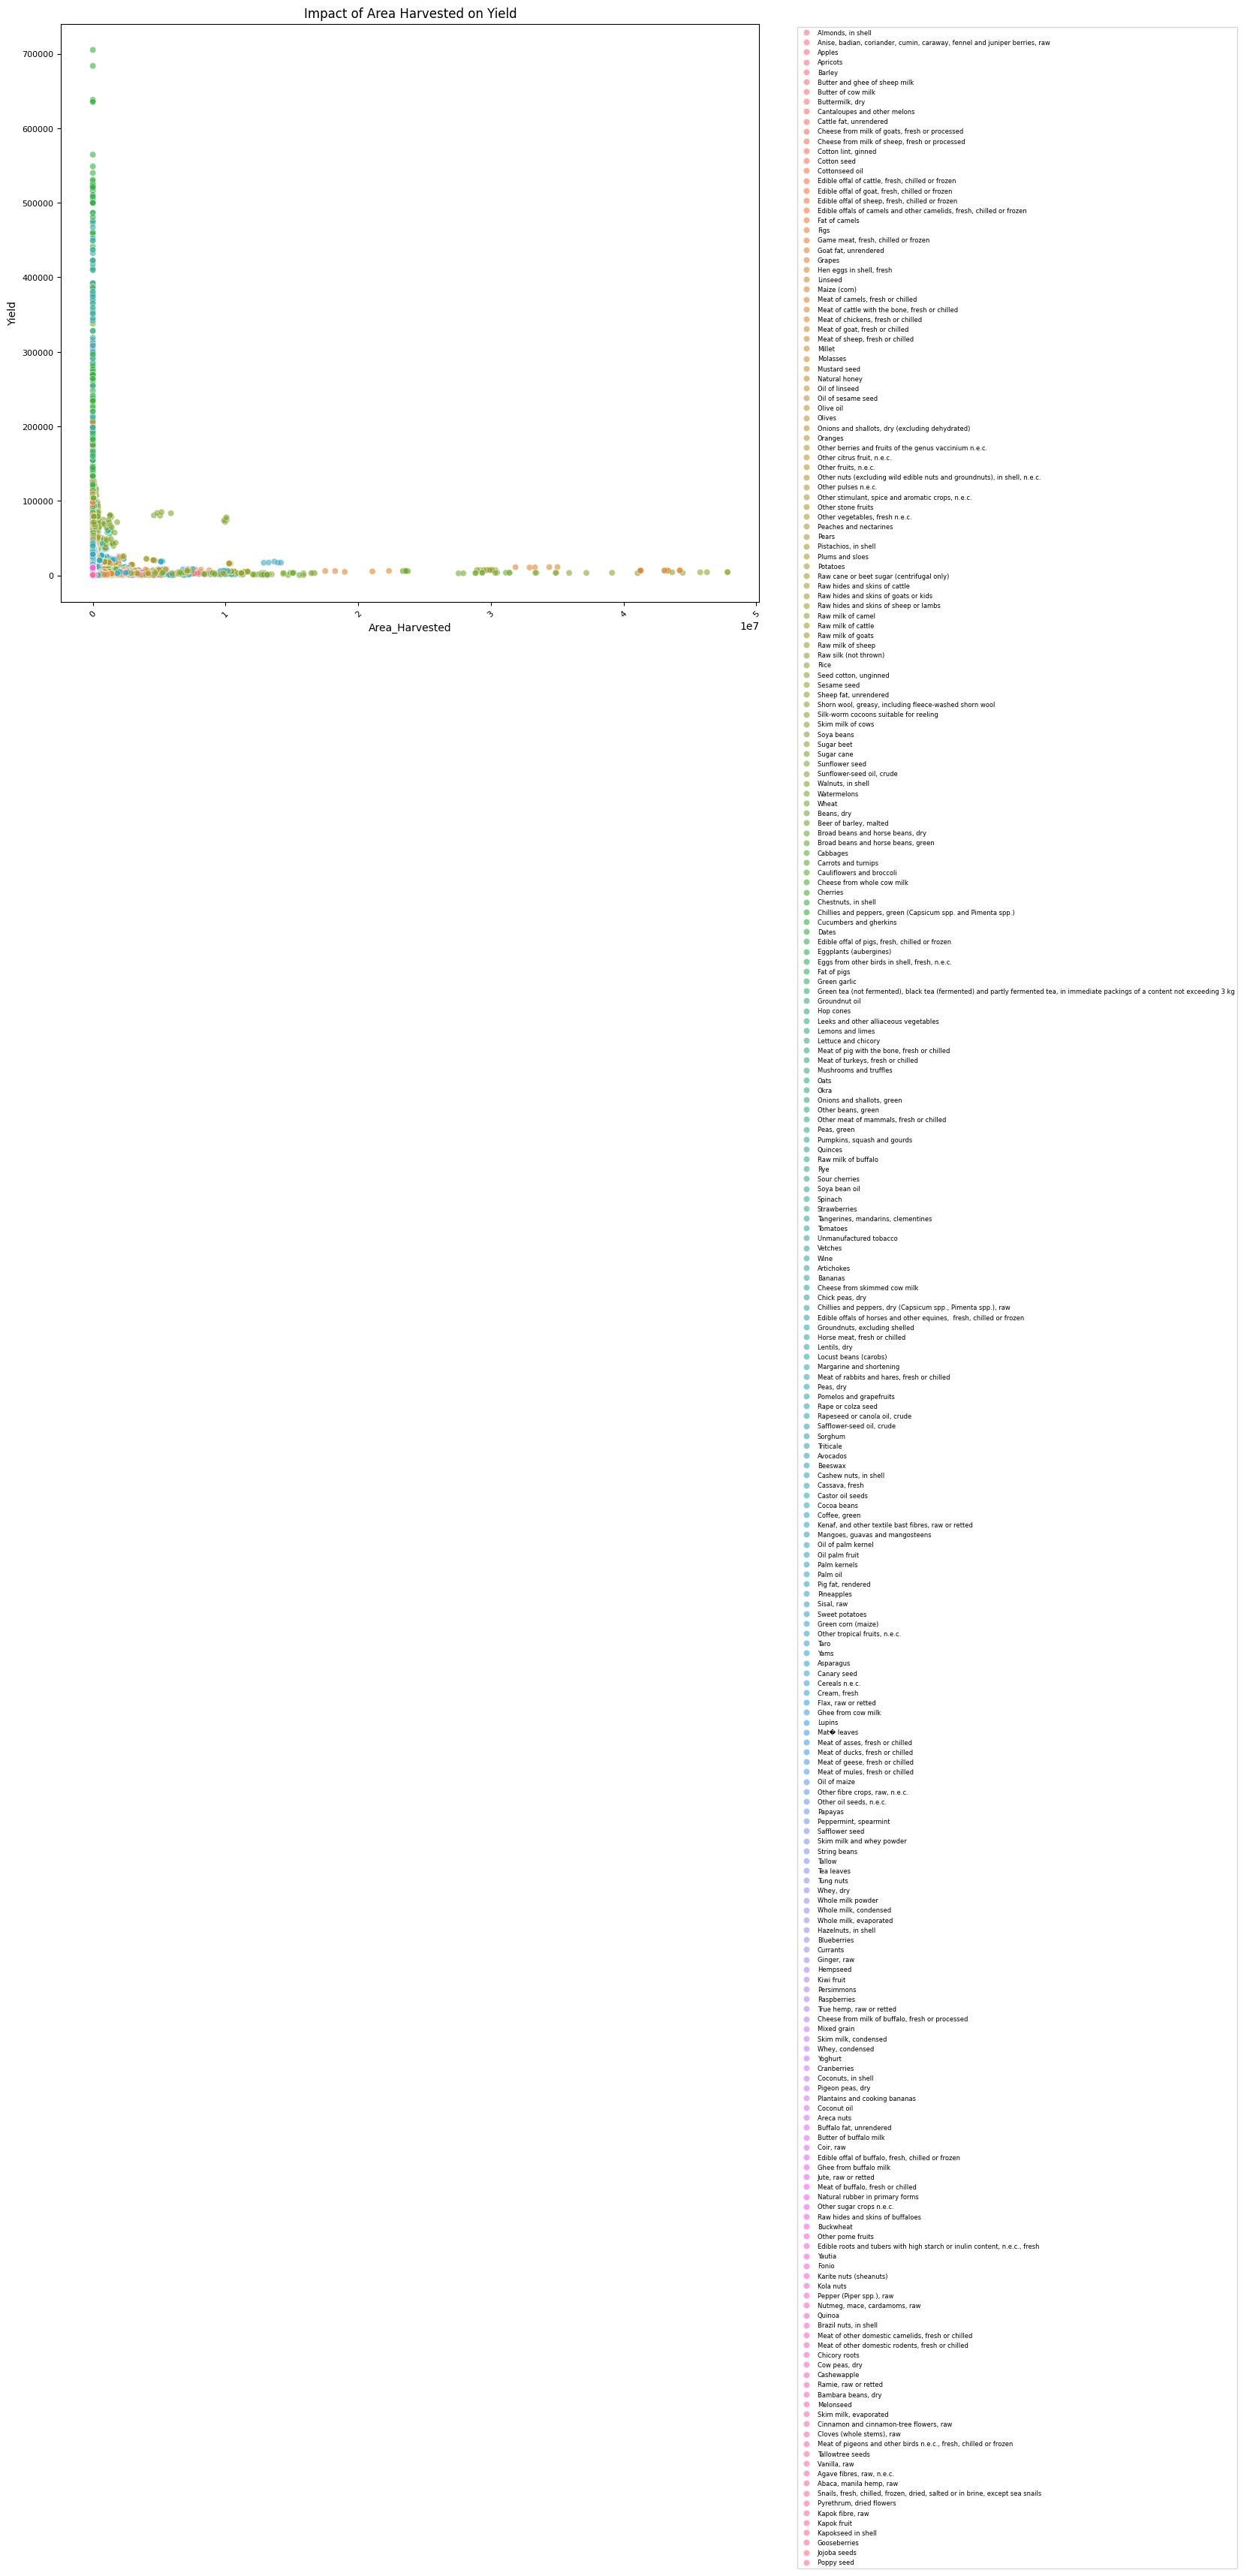

In [10]:
# 4. Environmental Relationships
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_pivot, x='Area_Harvested', y='Yield', hue='Item', alpha=0.6)
plt.title("Impact of Area Harvested on Yield")
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=6, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


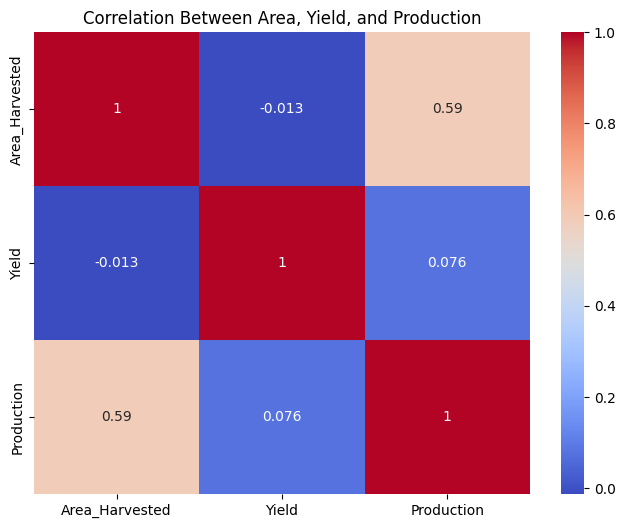

In [11]:
# 5. Input-Output Relationships
plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot[['Area_Harvested', 'Yield', 'Production']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Area, Yield, and Production")
plt.show()


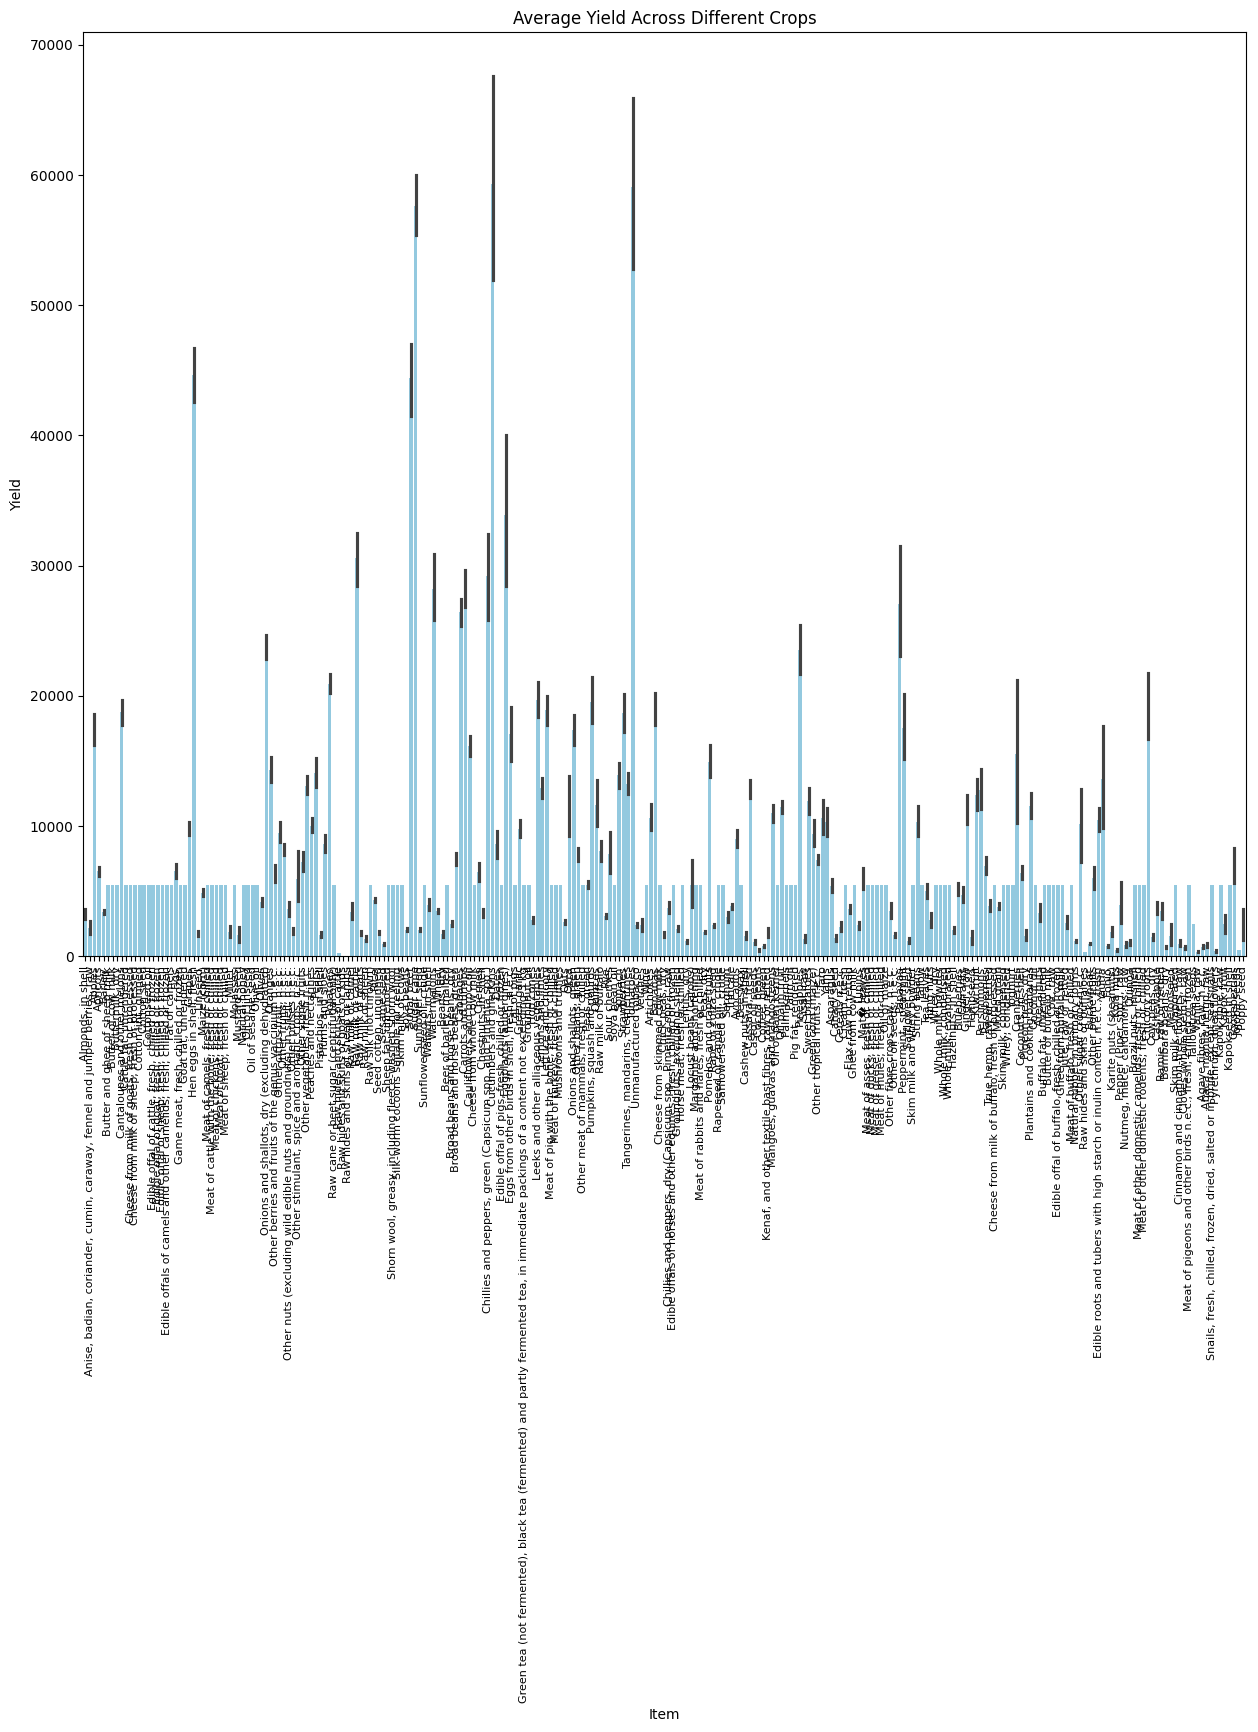

In [12]:
# 6. Comparative Analysis (Across Crops and Regions)
plt.figure(figsize=(15, 12))
sns.barplot(data=df_pivot, x='Item', y='Yield', color='skyblue')
plt.xticks(rotation=90, fontsize=8)
plt.title("Average Yield Across Different Crops")
plt.show()

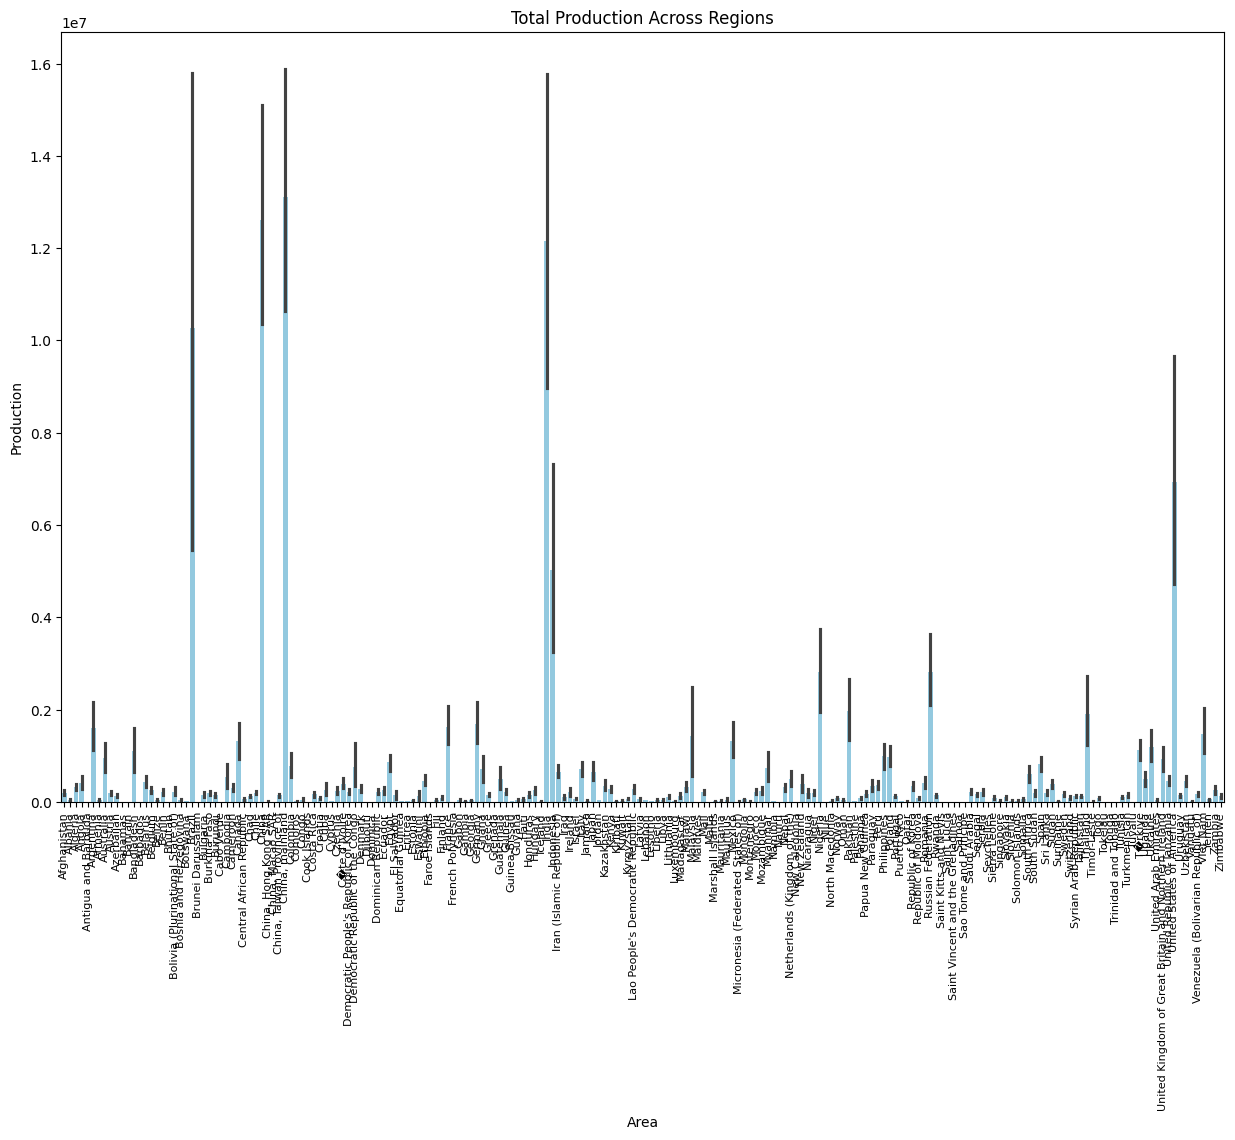

In [13]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df_pivot, x='Area', y='Production', color='skyblue')
plt.xticks(rotation=90, fontsize=8)
plt.title("Total Production Across Regions")
plt.show()


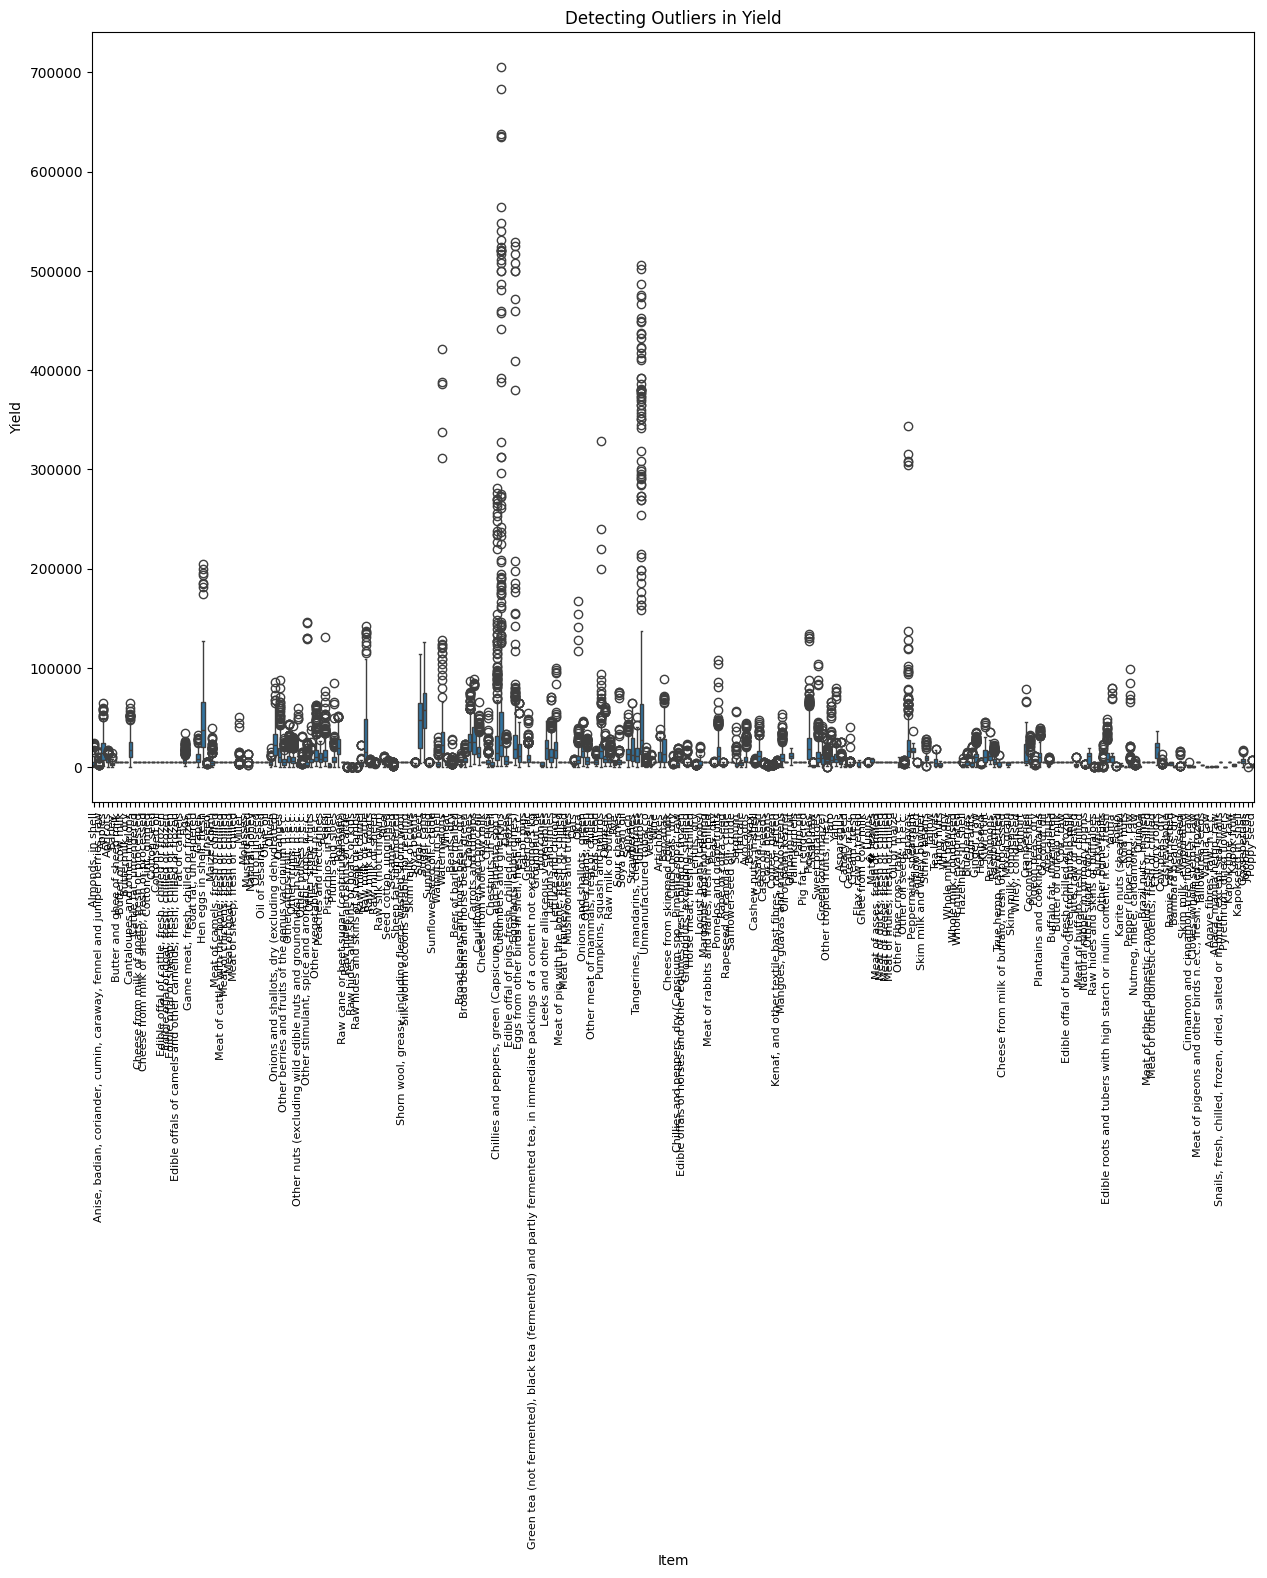

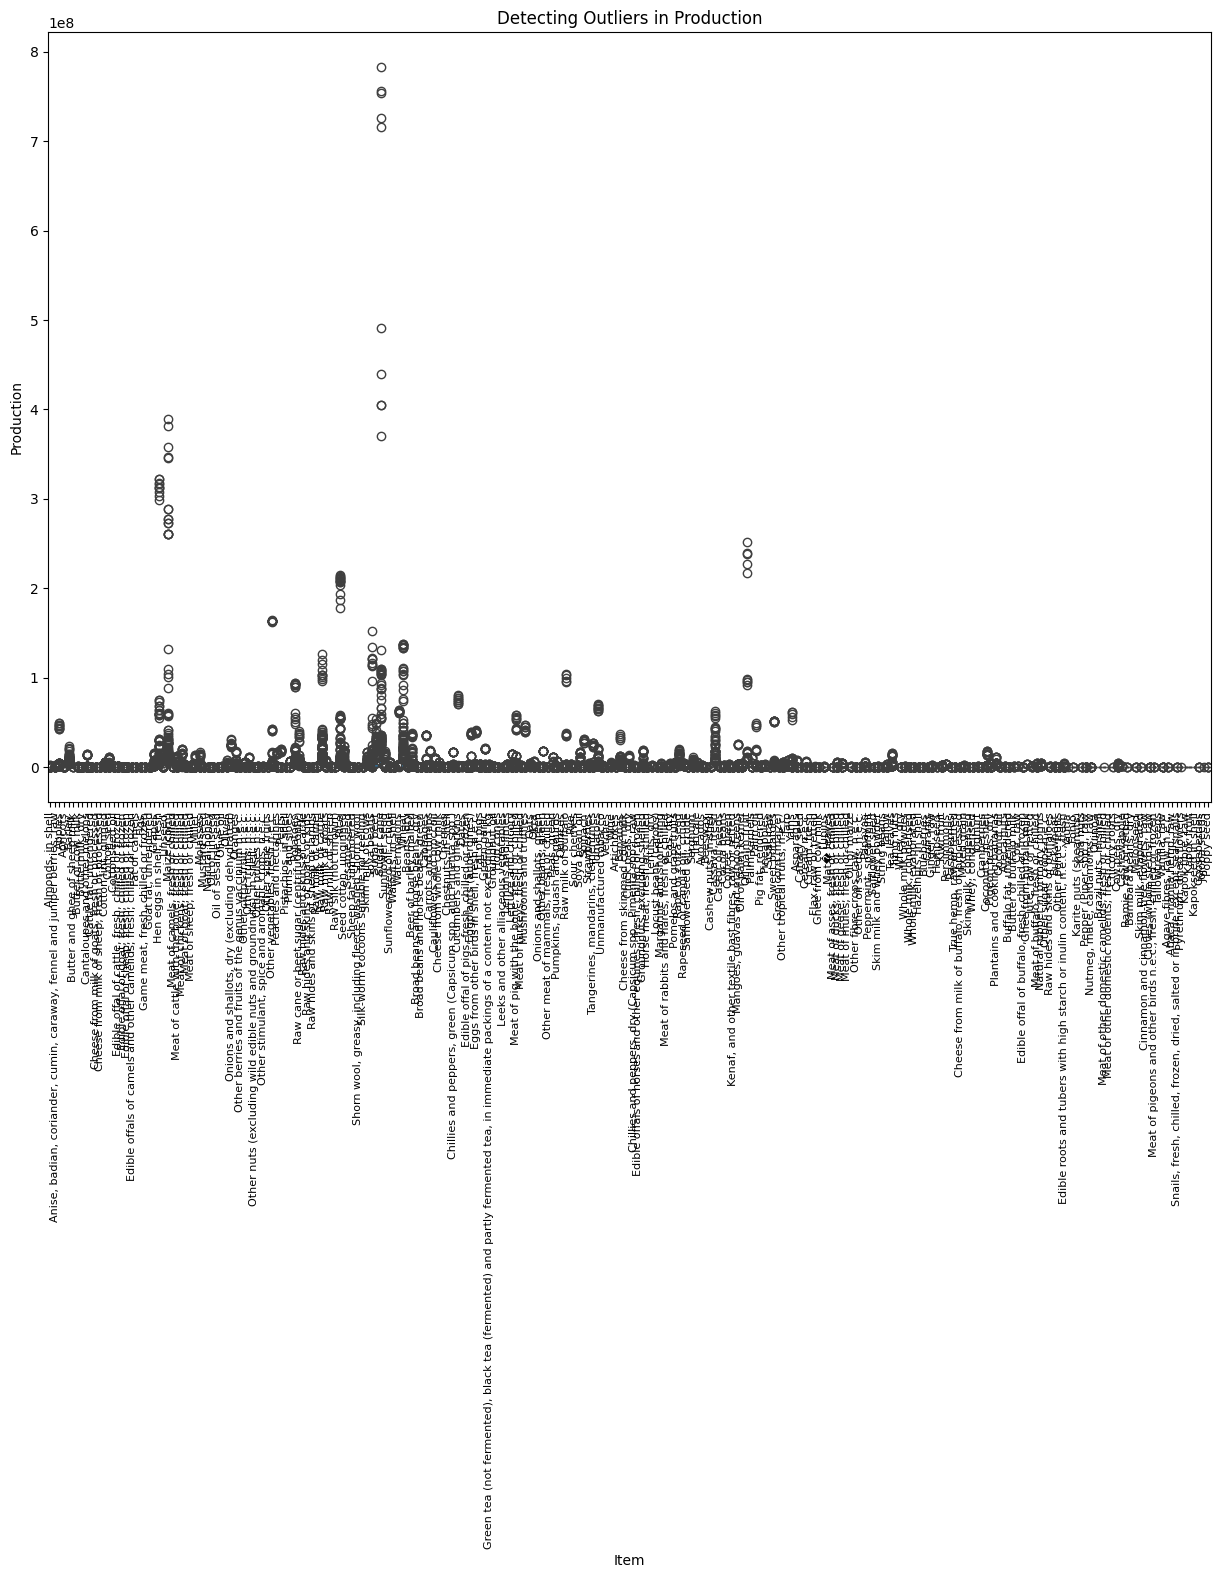

In [14]:
# 7. Outliers and Anomalies Detection
plt.figure(figsize=(15, 10))
sns.boxplot(x='Item', y='Yield', data=df_pivot)
plt.xticks(rotation=90, fontsize=8)
plt.title("Detecting Outliers in Yield")
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(x='Item', y='Production', data=df_pivot)
plt.xticks(rotation=90, fontsize=8)
plt.title("Detecting Outliers in Production")
plt.show()

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# **Apply Label Encoding for High-Cardinality Categorical Features**
label_encoders = {}
for col in ["Area", "Item"]:  # Encoding categorical variables
    label_encoders[col] = LabelEncoder()
    df_pivot[col] = label_encoders[col].fit_transform(df_pivot[col])

# Define Features (X) and Target Variable (y)
X = df_pivot.drop(columns=["Production"])  # Features (exclude target)
y = df_pivot["Production"]  # Target variable (Crop Production in Tons)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.36090586961341453
MAE: 999234.7930043266
MSE: 64470906486452.81


In [16]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Alpha controls regularization strength

# Train the model
ridge_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate performance
print("Ridge Regression R² Score:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))


Ridge Regression R² Score: 0.36090586961230275
Ridge Regression MAE: 999234.7925175866
Ridge Regression MSE: 64470906486564.96


In [17]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # Alpha controls regularization strength

# Train the model
lasso_model.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate performance
print("Lasso Regression R² Score:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))


Lasso Regression R² Score: 0.3609058696110655
Lasso Regression MAE: 999234.7918733542
Lasso Regression MSE: 64470906486689.78


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

# Load dataset
df_pivot = pd.read_csv("cleaned_crop_data.csv")  # Replace with actual file

# Apply Label Encoding for High-Cardinality Categorical Features
label_encoders = {}
for col in ["Area", "Item"]:  
    label_encoders[col] = LabelEncoder()
    df_pivot[col] = label_encoders[col].fit_transform(df_pivot[col])

# Define X and y
X = df_pivot.drop(columns=["Production"])
y = df_pivot["Production"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Save Model & Features for Streamlit App
joblib.dump(model, "crop_production_rf_model.pkl")
joblib.dump(list(X.columns), "model_features.pkl")


R² Score: 0.9542613444578922
MAE: 113082.41894548576
MSE: 4614050488130.099


['model_features.pkl']